[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.76862745 0.61176471 0.58039216 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.49803922 0.49803922 0.49803922 1.        ]
 [0.78039216 0.78039216 0.78039216 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.85882353 0.85882353 0.55294118 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]
 [0.61960784 0.85490196 0.89803922 1.        ]
 [0.61960784 0.85490196 0.89803922 1.        ]
 [0.61960784 

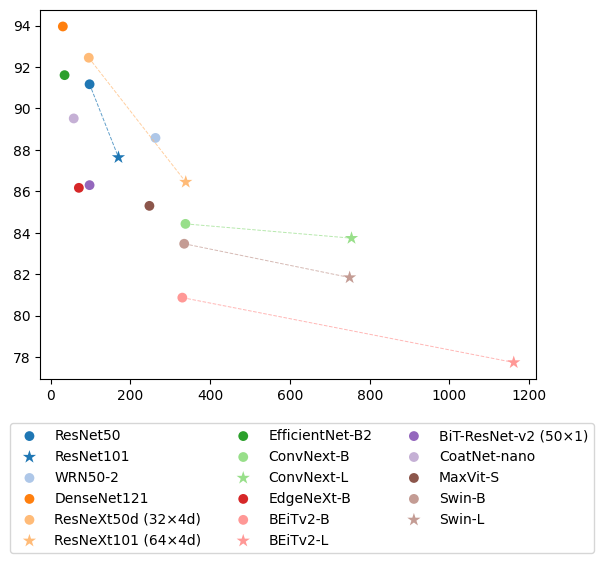

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy import stats

models = {'ResNet': {'model': ['ResNet50', 'ResNet101'], 
                     'params': [97.492, 169.942],
                     'mCE-3dcc': [91.5, 88.47], 'rCE-3dcc': [],
                     'mCE-C': [ 91.17, 87.64,], 'rCE-C': [],
                     'mCE-Cbar': [96.4, 88.5,], 'rCE-Cmark': []},
          'WRN': {'model': ['WRN50-2'], 
                     'params': [262.769,],
                     'mCE-3dcc': [89.45, ], 'rCE-3dcc': [],
                     'mCE-C': [88.58,], 'rCE-C': [],
                     'mCE-Cbar': [87.45, ], 'rCE-Cmark': []},
          'DenseNet': {'model': ['DenseNet121'], 
                     'params': [30.437,],
                     'mCE-3dcc': [94.33,], 'rCE-3dcc': [],
                     'mCE-C': [93.96,], 'rCE-C': [],
                     'mCE-Cbar': [97.72,], 'rCE-Cmark': []},
          'ResNeXt': {'model': ['ResNeXt50d (32×4d)', 'ResNeXt101 (64×4d)'], 
                     'params': [95.478, 338.712],
                     'mCE-3dcc': [93.08, 88.07], 'rCE-3dcc': [],
                     'mCE-C': [92.45, 86.45], 'rCE-C': [],
                     'mCE-Cbar': [97.23, 86.93], 'rCE-Cmark': []},
          'EfficientNet': {'model': ['EfficientNet-B2'], 
                     'params': [34.752,],
                     'mCE-3dcc': [92.54,], 'rCE-3dcc': [],
                     'mCE-C': [91.61,], 'rCE-C': [],
                     'mCE-Cbar': [91.82,], 'rCE-Cmark': []},
          'ConvNext': {'model': ['ConvNext-B', 'ConvNext-L'], 
                       'params': [337.95, 754.423],
                       'mCE-3dcc': [86.59, 85.68], 'rCE-3dcc': [],
                       'mCE-C': [84.43, 83.74,], 'rCE-C': [],
                       'mCE-Cbar': [84.2, 83.26,], 'rCE-Cmark': []},
          'EdgeNeXt': {'model': ['EdgeNeXt-B'], 
                     'params': [70.615],
                     'mCE-3dcc': [87.76,], 'rCE-3dcc': [],
                     'mCE-C': [86.17,], 'rCE-C': [],
                     'mCE-Cbar': [87.02,], 'rCE-Cmark': []},
          'BEiT': {'model': ['BEiTv2-B', 'BEiTv2-L',],  'params': [330.09, 1161.31, ],
                     'mCE-3dcc': [83.72, 80.69, ], 'rCE-3dcc': [],
                     'mCE-C': [80.87, 77.74, ], 'rCE-C': [],
                     'mCE-Cbar': [84.2, 83.26, ], 'rCE-Cmark': []},
          'BiT': {'model': ['BiT-ResNet-v2 (50×1)'],  'params': [97.463,],
                     'mCE-3dcc': [88.43, ], 'rCE-3dcc': [],
                     'mCE-C': [86.3, ], 'rCE-C': [],
                     'mCE-Cbar': [97.72, ], 'rCE-Cmark': []},
          'CoatNet': {'model': ['CoatNet-nano'],  'params': [ 57.759,],
                     'mCE-3dcc': [92.06, ], 'rCE-3dcc': [],
                     'mCE-C': [89.52,], 'rCE-C': [],
                     'mCE-Cbar': [87.02,], 'rCE-Cmark': []},
          'MaxVit': {'model': ['MaxVit-S'],  'params': [247.555, ],
                     'mCE-3dcc': [87.34, ], 'rCE-3dcc': [],
                     'mCE-C': [85.3, ], 'rCE-C': [],
                     'mCE-Cbar': [91.82, ], 'rCE-Cmark': []},
          'Swin': {'model': ['Swin-B', 'Swin-L', ],  'params': [334.809, 749.712, ],
                     'mCE-3dcc': [85.83, 84.15, ], 'rCE-3dcc': [],
                     'mCE-C': [83.47, 81.84, ], 'rCE-C': [],
                     'mCE-Cbar': [88.5, 87.45, ], 'rCE-Cmark': []},
         }

model_trans = ['MViTv2-B', 'Vit-B/8' , 'VOLO-D3','VOLO-D5']
params_trans = [ 196.353, 330.265, 329.304, 1127.074]
C = [ 83.34, 88.19, 83.65, 82.44]
Cbar = [ 96.4, 97.23, 86.93]
dcc = [85.71, 92.13, 85.12, 84.24]

colors = cm.tab20(range(30))
print(colors)

markers = ['o',  # circle
           '*',  # star 
           's',  # square 
           'd',  # diamond
          ]
marker_size = [50, 100, 50, 50]

plt.figure()

ax = plt.axes()
ax.set_autoscale_on(True)
model_names = []
for c, model in enumerate(models):
    # print('key: ', model)
    # print(models[model])
    # scatter plot
    for j, m in enumerate(models[model]['model']):
        model_names.append(m)
        ax.scatter(models[model]['params'][j], 
                   models[model]['mCE-C'][j],
                   color=colors[c],  marker=markers[j], s=marker_size[j], 
                   edgecolors='none',)


# line plot
for c, model in enumerate(models):
    ax.plot(models[model]['params'], models[model]['mCE-C'], 
           linestyle='--', color=colors[c], alpha=0.7, linewidth=0.7)
    

    
plt.legend(model_names, bbox_to_anchor=(1.13, -.1),ncol=3)
xlim = np.array(ax.get_xlim())

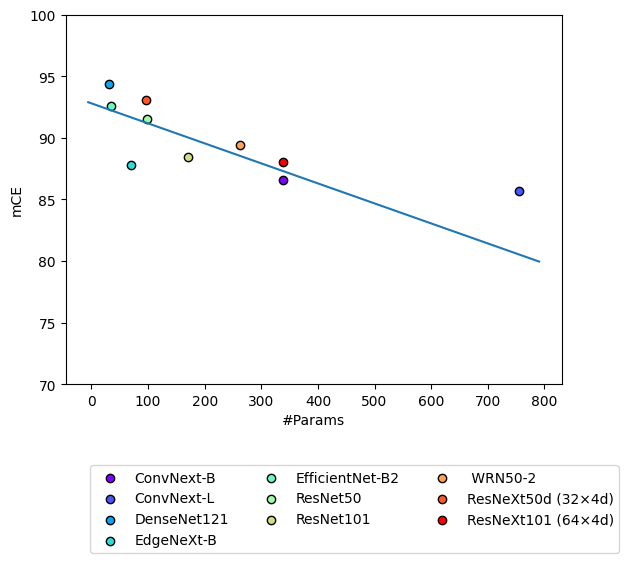

In [3]:
model_trans = ['BEiTv2-B', 'BEiTv2-L', 'BiT-ResNet-v2 (50×1)', 'CoatNet-nano', 'MaxVit-S','MViTv2-B', 'Swin-B', 'Swin-L', 'Vit-B/8' , 'VOLO-D3','VOLO-D5']
model_name = ['ConvNext-B', 'ConvNext-L', 'DenseNet121', 'EdgeNeXt-B', 'EfficientNet-B2', 
             'ResNet50', 'ResNet101',' WRN50-2', 'ResNeXt50d (32×4d)', 'ResNeXt101 (64×4d)']

x = [337.95, 754.423, 30.437, 70.615, 34.752, 97.492, 169.942, 262.769, 95.478, 338.712] # model size
x_trans = [330.09, 1161.31, 97.463, 57.759, 247.555, 196.353, 334.809, 749.712, 330.265, 329.304, 1127.074]

# y = [84.43, 83.74, 93.96, 86.17, 91.61, 91.17, 87.64, 88.58, 92.45, 86.45] # ImageNet-C - mCE
#y_trans = [80.87, 77.74, 86.3, 89.52, 85.3, 83.34, 83.47, 81.84, 88.19, 83.65, 82.44]

# y = [84.2, 83.26, 97.72, 87.02, 91.82, 96.4, 88.5, 87.45, 97.23, 86.93] # ImageNet-C-bar - mCE
# y_trans = [90.86, 77.06, 85.62, 94.8, 83.52, 81.82, 81.46, 80.05, 86.77, 84.72, 83.68]

y = [86.59, 85.68, 94.33, 87.76, 92.54, 91.5, 88.47, 89.45, 93.08, 88.07] # ImageNet-3DCC - mCE
y_trans = [83.72, 80.69, 88.43, 92.06, 87.34, 85.71, 85.83, 84.15, 92.13, 85.12, 84.24]


colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.figure()

ax = plt.axes()
ax.set_autoscale_on(True)
for i in range(len(y)):

    ax.scatter(x[i],y[i],color=colors[i],  marker='o',edgecolors='k',)
    

plt.legend(model_name,bbox_to_anchor=(1.13, -.2),ncol=3)

xlim = np.array(ax.get_xlim())

x = np.asarray(x)
def remove_500(x,y):
    for i in range(len(x)-1,0,-1):
        if x[i] >= 500:
            y.remove(y[i])
        
    return  y

y = remove_500(x,y)
x = x[x<500]

gradient, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
plt.plot(xlim, gradient * xlim + intercept, '-')
plt.xlabel('#Params')
plt.ylabel('mCE')
plt.ylim((70,100))
plt.savefig('plot_imagenet3dcc.jpg',bbox_inches='tight')





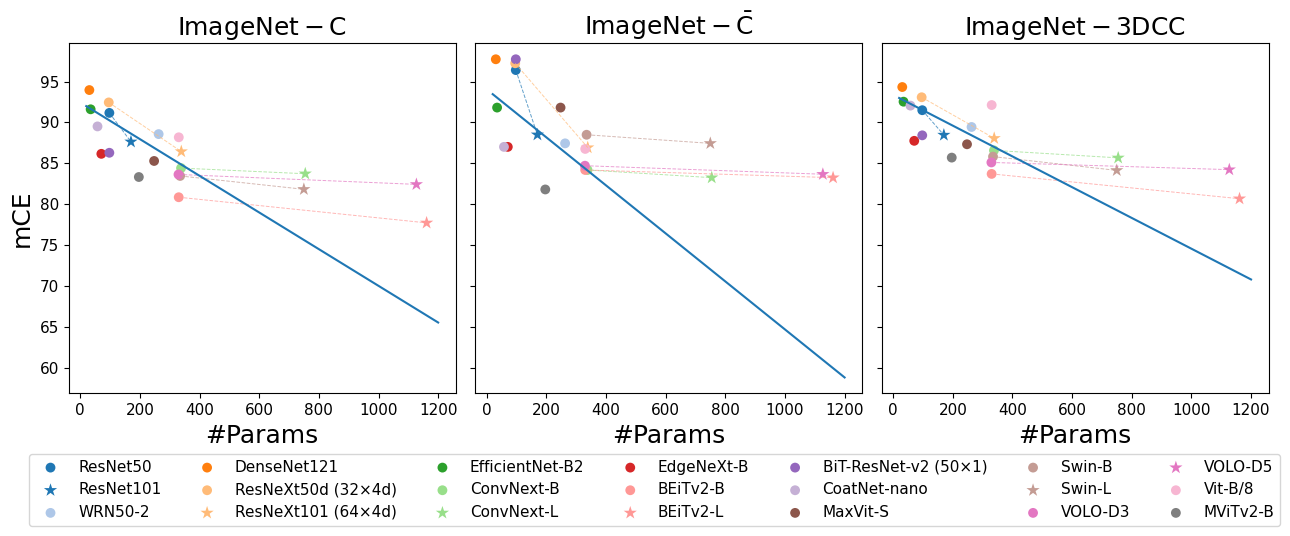

In [50]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy import stats

models = {'ResNet': {'model': ['ResNet50', 'ResNet101'], 
                     'params': [97.492, 169.942],
                     'mCE-3dcc': [91.5, 88.47], 'rCE-3dcc': [],
                     'mCE-C': [ 91.17, 87.64,], 'rCE-C': [],
                     'mCE-Cbar': [96.4, 88.5,], 'rCE-Cmark': []},
          'WRN': {'model': ['WRN50-2'], 
                     'params': [262.769,],
                     'mCE-3dcc': [89.45, ], 'rCE-3dcc': [],
                     'mCE-C': [88.58,], 'rCE-C': [],
                     'mCE-Cbar': [87.45, ], 'rCE-Cmark': []},
          'DenseNet': {'model': ['DenseNet121'], 
                     'params': [30.437,],
                     'mCE-3dcc': [94.33,], 'rCE-3dcc': [],
                     'mCE-C': [93.96,], 'rCE-C': [],
                     'mCE-Cbar': [97.72,], 'rCE-Cmark': []},
          'ResNeXt': {'model': ['ResNeXt50d (32×4d)', 'ResNeXt101 (64×4d)'], 
                     'params': [95.478, 338.712],
                     'mCE-3dcc': [93.08, 88.07], 'rCE-3dcc': [],
                     'mCE-C': [92.45, 86.45], 'rCE-C': [],
                     'mCE-Cbar': [97.23, 86.93], 'rCE-Cmark': []},
          'EfficientNet': {'model': ['EfficientNet-B2'], 
                     'params': [34.752,],
                     'mCE-3dcc': [92.54,], 'rCE-3dcc': [],
                     'mCE-C': [91.61,], 'rCE-C': [],
                     'mCE-Cbar': [91.82,], 'rCE-Cmark': []},
          'ConvNext': {'model': ['ConvNext-B', 'ConvNext-L'], 
                       'params': [337.95, 754.423],
                       'mCE-3dcc': [86.59, 85.68], 'rCE-3dcc': [],
                       'mCE-C': [84.43, 83.74,], 'rCE-C': [],
                       'mCE-Cbar': [84.2, 83.26,], 'rCE-Cmark': []},
          'EdgeNeXt': {'model': ['EdgeNeXt-B'], 
                     'params': [70.615],
                     'mCE-3dcc': [87.76,], 'rCE-3dcc': [],
                     'mCE-C': [86.17,], 'rCE-C': [],
                     'mCE-Cbar': [87.02,], 'rCE-Cmark': []},
          'BEiT': {'model': ['BEiTv2-B', 'BEiTv2-L',],  'params': [330.09, 1161.31, ],
                     'mCE-3dcc': [83.72, 80.69, ], 'rCE-3dcc': [],
                     'mCE-C': [80.87, 77.74, ], 'rCE-C': [],
                     'mCE-Cbar': [84.2, 83.26, ], 'rCE-Cmark': []},
          'BiT': {'model': ['BiT-ResNet-v2 (50×1)'],  'params': [97.463,],
                     'mCE-3dcc': [88.43, ], 'rCE-3dcc': [],
                     'mCE-C': [86.3, ], 'rCE-C': [],
                     'mCE-Cbar': [97.72, ], 'rCE-Cmark': []},
          'CoatNet': {'model': ['CoatNet-nano'],  'params': [ 57.759,],
                     'mCE-3dcc': [92.06, ], 'rCE-3dcc': [],
                     'mCE-C': [89.52,], 'rCE-C': [],
                     'mCE-Cbar': [87.02,], 'rCE-Cmark': []},
          'MaxVit': {'model': ['MaxVit-S'],  'params': [247.555, ],
                     'mCE-3dcc': [87.34, ], 'rCE-3dcc': [],
                     'mCE-C': [85.3, ], 'rCE-C': [],
                     'mCE-Cbar': [91.82, ], 'rCE-Cmark': []},
          'Swin': {'model': ['Swin-B', 'Swin-L', ],  'params': [334.809, 749.712, ],
                     'mCE-3dcc': [85.83, 84.15, ], 'rCE-3dcc': [],
                     'mCE-C': [83.47, 81.84, ], 'rCE-C': [],
                     'mCE-Cbar': [88.5, 87.45, ], 'rCE-Cmark': []},
        'VOLO': {'model': ['VOLO-D3', 'VOLO-D5', ],  'params': [329.3, 1127.07, ],
                    'mCE-3dcc': [85.12, 84.24, ], 'rCE-3dcc': [],
                    'mCE-C': [83.65, 82.44, ], 'rCE-C': [],
                    'mCE-Cbar': [84.72, 83.68, ], 'rCE-Cmark': []},
        'ViT': {'model': ['Vit-B/8' ],  'params': [330.27, ],
                'mCE-3dcc': [92.13, ], 'rCE-3dcc': [],
                'mCE-C': [88.19,  ], 'rCE-C': [],
                'mCE-Cbar': [86.77, ], 'rCE-Cmark': []},
        'MViTv2': {'model': ['MViTv2-B' ],  'params': [196.35, ],
                'mCE-3dcc': [85.71, ], 'rCE-3dcc': [],
                'mCE-C': [83.34,  ], 'rCE-C': [],
                'mCE-Cbar': [81.82, ], 'rCE-Cmark': []},
         }

x_model_size = [330.09,1161.31,97.463,57.759,337.95,754.423,30.437,70.615,34.752,247.555,196.353,97.492,169.942,262.769,95.478,338.712,334.809,749.712,330.265,329.304,1127.074]
y_mCE = {0: [80.87,77.74,86.3,89.52,84.43,83.74,93.96,86.17,91.61,85.3,83.34,91.17,87.64,88.58,92.45,86.45,83.47,81.84,88.19,83.65,82.44],
          1: [79.75,77.06,85.62,89.43,84.2,83.26,95.67,87.02,91.82,83.52,81.82,92.63,88.5,87.45,94.21,86.93,81.46,80.05,86.77,84.72,83.68], 
          2: [83.72,80.69,88.43,92.06,86.59,85.68,94.33,87.76,92.54,87.34,85.71,91.5,88.47,89.45,93.08,88.07,85.83,84.15,92.13,85.12,84.24]}
colors = cm.tab20(range(30))
# print(colors)

markers = ['o',  # circle
           '*',  # star 
           's',  # square 
           'd',  # diamond
          ]
marker_size = [50, 100, 50, 50]
datasets = ['mCE-C','mCE-Cbar','mCE-3dcc']
datasets_name = [r'$\mathrm{ImageNet-C}$',r'$\mathrm{ImageNet-\bar{C}}$',r'$\mathrm{ImageNet-3DCC}$']
# plt.figure()
fig, axs = plt.subplots(1,3,sharex=True,sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)

# ax = plt.axes()
# ax.set_autoscale_on(True)
for dataset_i in range(3):

    model_names = []
    for c, model in enumerate(models):
        # print('key: ', model)
        # print(models[model])
        # scatter plot
        for j, m in enumerate(models[model]['model']):
            model_names.append(m)
            axs[dataset_i].scatter(models[model]['params'][j], 
                    models[model][datasets[dataset_i]][j],
                    color=colors[c],  marker=markers[j], s=marker_size[j], 
                    edgecolors='none',)


    # line plot
    for c, model in enumerate(models):
        axs[dataset_i].plot(models[model]['params'], models[model][datasets[dataset_i]], 
            linestyle='--', color=colors[c], alpha=0.7, linewidth=0.7)
    # fit the linear function
    xlim = np.array(axs[0].get_xlim())
    x_model_size = np.asarray(x_model_size)
    def remove_500(x,y):
        y_removed = []
        for i in range(len(x)):
            if x[i] < 500:
                y_removed.append(y[i])
            
        return  y_removed

    y = remove_500(x_model_size,y_mCE[dataset_i])
    x = x_model_size[x_model_size<500]
   

    gradient, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
    axs[dataset_i].plot([20,1200], gradient * xlim + intercept, '-')
    axs[dataset_i].set_xlabel('#Params',fontsize=18)
    axs[0].set_ylabel('mCE',fontsize=18)
    axs[dataset_i].set_title(datasets_name[dataset_i],fontsize=18)
    # axs[dataset_i].set_autoscale_on(True)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.8, wspace=0.05, hspace=-0.85)
plt.rcParams.update({'font.size': 11})
plt.legend(model_names, bbox_to_anchor=(1.05, -.15),ncol=7)
plt.savefig('plot_imagenetbenchmark.pdf',bbox_inches='tight')

